<a href="https://colab.research.google.com/github/renu0071989/directory/blob/main/Updated_Time_Series_Analytics_and_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from numpy import log
from pandas import Series
from datetime import datetime

In [ ]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#dataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\TSF_8_10_Morning\\airline_passengers.csv")

In [ ]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    int64  
 1   1st Diff                 143 non-null    float64
 2   2nd Diff                 142 non-null    float64
 3   seasonality              132 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


In [ ]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [ ]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# Setting Index for Month column
dataset.set_index('Month', inplace=True)

In [ ]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


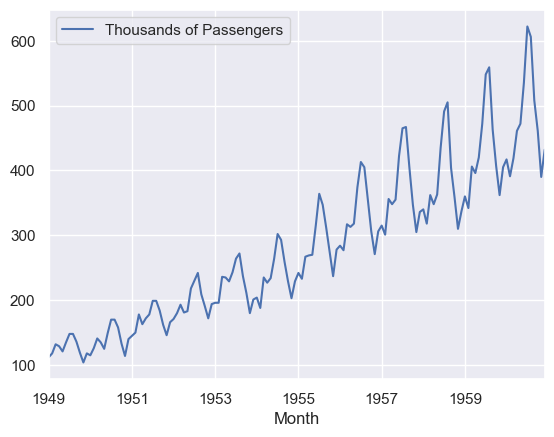

In [ ]:
dataset.plot()
plt.show()

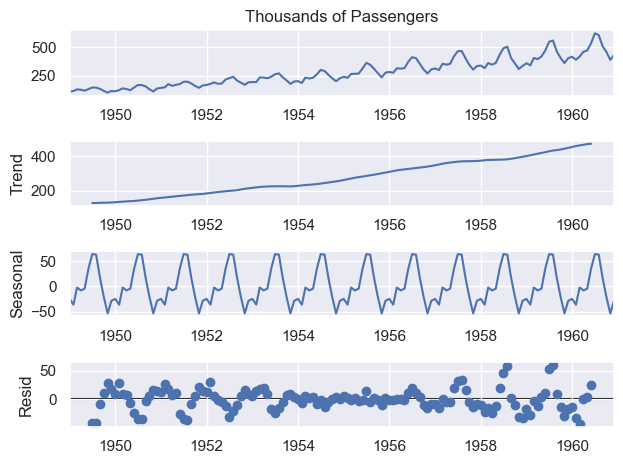

In [ ]:
# Decomposition to check dataset pattern/component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

![image.png](attachment:image.png)

In [ ]:
# Check whether autocorrelation there in the dataset or not ?
# Positive Autocorrelation found

import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

# Check whether time series is stationary or not - Mandatory steps

# How to check - Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']

    for a, b in zip(result, labels):
        print(b + " : "+ str(a))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is Non-Stationary")

In [ ]:
adf_check(dataset['Thousands of Passengers'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : 0.8153688792060543
p-value : 0.9918802434376411
#Lags : 13
No. of obs : 130
Week evidence against null hypothesis and my timeseries is Non-Stationary


In [ ]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [ ]:
#dataset.head(10)

In [ ]:
adf_check(dataset['1st Diff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -2.8292668241700034
p-value : 0.054213290283824954
#Lags : 12
No. of obs : 130
Week evidence against null hypothesis and my timeseries is Non-Stationary


In [ ]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [ ]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [ ]:
adf_check(dataset['2nd Diff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags : 11
No. of obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# Trend  (p, d, q)
# Seasonality (P, D, Q)

# Trend
# d = 2

In [ ]:
# Seasonality
dataset['seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [ ]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [ ]:
adf_check(dataset['seasonality'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No. of obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# Trend  (p, d, q)
# Seasonality (P, D, Q)

# Trend
# d = 2
# D = 1

# p = ?
# P = ?
# q = ?
# Q = ?

# AR I MA Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Trend
# d = 2
# p = 4
# q = 2

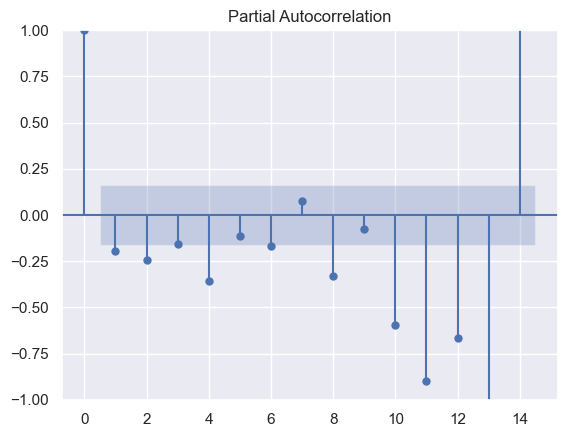

In [ ]:
plot_pacf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

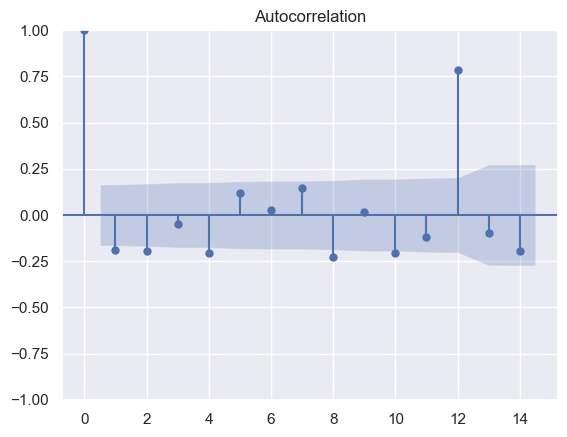

In [ ]:
plot_acf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

In [ ]:
# Trend
# d = 2
# p = 4
# q = 2

# Seasonality
# D = 1
# P = 2
# Q = 5


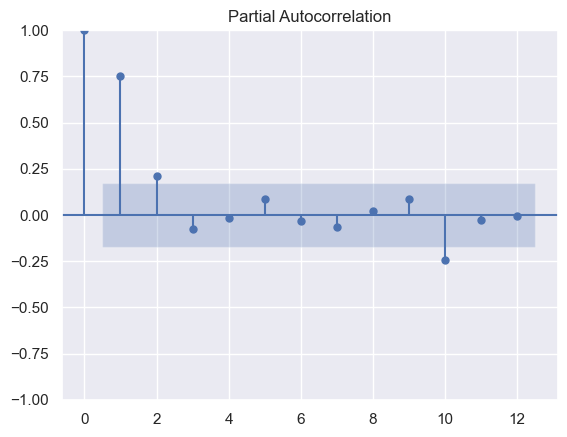

In [ ]:
plot_pacf(dataset['seasonality'].dropna(), lags=12)
plt.show()

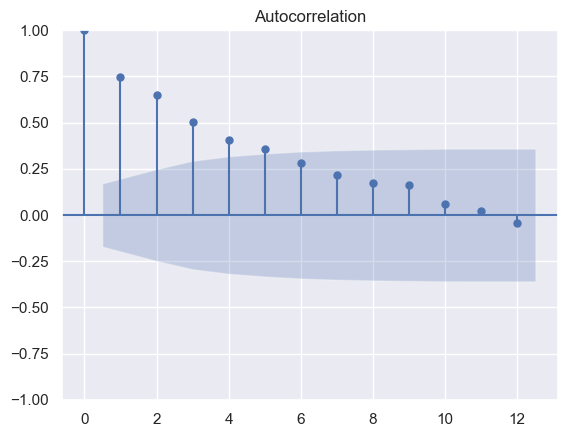

In [ ]:
plot_acf(dataset['seasonality'].dropna(), lags=12)
plt.show()

In [ ]:
# Trend
# d = 2
# p = 4
# q = 2

# Seasonality
# D = 1
# P = 2
# Q = 5

In [ ]:
dataset.head(2)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN


# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

![image.png](attachment:image.png)

In [ ]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                             order =(4,2,2), seasonal_order=(2,1,1,12))

result = model.fit()
print(result.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.783
Date:                              Mon, 15 May 2023   AIC                           1015.567
Time:                                      09:27:18   BIC                           1044.242
Sample:                                  01-01-1949   HQIC                          1027.218
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3607      0.097    -14.054      0.000      -1.550      -1.171
ar.L2         -0.49

In [ ]:
# SARIMAX(4, 2, 2)x(2, 1, 5, 12) : AIC - 1021.460
# SARIMAX(4, 2, 2)x(2, 1, 4, 12) : AIC - 1020.041
# SARIMAX(4, 2, 2)x(2, 1, 3, 12) : AIC - 1018.523
# SARIMAX(4, 2, 2)x(2, 1, 2, 12) : AIC - 1017.565
# SARIMAX(4, 2, 2)x(2, 1, 1, 12) : AIC - 1015.567 # this is the best basis manual approach

In [ ]:
len(dataset)

144

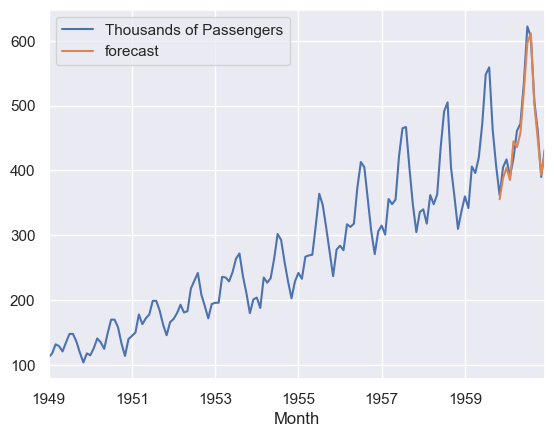

In [ ]:
# forecast with the existing data before prediction the future time
dataset['forecast'] = result.predict(start=130, end = 144, dynamic=True)
dataset[['Thousands of Passengers','forecast']].plot()
plt.show()

In [ ]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.502832
1960-09-01,508,-98.0,-82.0,45.0,503.392867
1960-10-01,461,-47.0,51.0,54.0,448.403039
1960-11-01,390,-71.0,-24.0,28.0,393.121299
1960-12-01,432,42.0,113.0,27.0,426.405210


In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(61)]

In [ ]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [ ]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [ ]:
future_dates_df

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
# concatnate the both table (original table - dataset and forecast table - future_dates_df)

future_df = pd.concat([dataset, future_dates_df])

In [ ]:
future_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [ ]:
future_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(future_df)

204

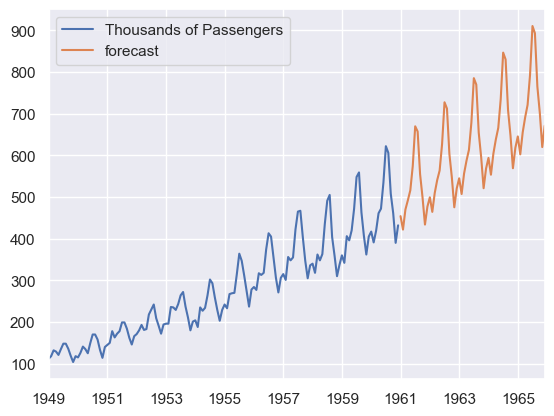

In [ ]:
future_df['forecast'] = result.predict(start=144, end=204, dynamic=True)
future_df[['Thousands of Passengers','forecast']].plot()
plt.show()

In [ ]:
future_df.tail(60)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,454.096841
1961-02-01,NaN,NaN,NaN,NaN,421.850376
1961-03-01,NaN,NaN,NaN,NaN,470.043479
1961-04-01,NaN,NaN,NaN,NaN,492.245088
1961-05-01,NaN,NaN,NaN,NaN,515.998606
1961-06-01,NaN,NaN,NaN,NaN,574.280047
1961-07-01,NaN,NaN,NaN,NaN,669.714946
1961-08-01,NaN,NaN,NaN,NaN,657.239051
1961-09-01,NaN,NaN,NaN,NaN,554.801356
1961-10-01,NaN,NaN,NaN,NaN,499.252237


In [ ]:
future_df.to_csv("Final_Airline_passengers_details_for_5Years.csv")

In [ ]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\TSF_8_10_Morning'

# This is all about for the Forecasting Model for this project

# ****************** END *****************************************